<a href="https://colab.research.google.com/github/ssarwar035/I310-Project_Poverty-Levels-by-Race-and-Gender/blob/main/I310D_Final_Project_Black_Women.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OVERALL METHOD AND ALLOCATION**

Annual Poverty Level Wages - Chinmayee

Black women black men - Simaat

White women white men - Nithya

Hispanic women hispanic men - Sreehana

create 7 predictive models

1973-2000 for training the dataset
2000-2020 for predicted model

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

# **CLEANING**

In [ ]:
df = pd.read_csv('poverty_level_wages.csv')

# sort in ascending order by year
print(type(df.year[0]))
df.sort_values(by='year')

<class 'numpy.int64'>


,year,annual_poverty-level_wage,hourly_poverty-level_wage,0-75%_of_poverty_wages,75-100%_of_poverty_wages,share_below_poverty_wages,100-125%_of_poverty_wages,125-200%_of_poverty_wages,200-300%_of_poverty_wages,300%+_of_poverty_wages,...,women_300%+_of_poverty_wages,white_share_below_poverty_wages,white_men_share_below_poverty_wages,white_women_share_below_poverty_wages,black_share_below_poverty_wages,black_men_share_below_poverty_wages,black_women_share_below_poverty_wages,hispanic_share_below_poverty_wages,hispanic_men_share_below_poverty_wages,hispanic_women_share_below_poverty_wages
49,1973,4701,2.26,9.3,16.3,25.6,12.7,32.9,19.8,9.0,...,2.4,23.8,13.7,38.5,37.3,25.3,50.6,34.9,27.1,48.2
48,1974,5158,2.48,7.5,16.8,24.3,15.2,31.0,20.6,8.9,...,2.3,22.7,12.8,37.0,34.6,22.8,47.4,33.7,24.5,49.7
47,1975,5595,2.69,10.2,15.7,25.9,13.9,32.0,19.5,8.7,...,2.5,24.2,14.4,38.2,36.7,25.1,49.1,35.0,27.3,47.5
46,1976,5914,2.84,7.1,18.0,25.1,15.2,31.2,19.6,9.0,...,2.8,23.6,14.1,36.7,34.8,23.8,46.2,34.8,27.2,46.3
45,1977,6284,3.02,6.2,20.7,26.9,13.6,30.3,20.5,8.7,...,2.4,25.4,15.5,38.7,36.7,28.0,45.7,36.0,25.6,52.8
44,1978,6718,3.23,5.4,20.6,26.0,15.4,29.6,19.9,9.1,...,2.3,24.5,14.7,37.5,35.5,25.2,46.0,32.6,23.8,46.5
43,1979,7360,3.54,5.1,20.7,25.8,13.6,31.1,20.7,8.9,...,2.4,24.3,14.3,37.3,33.7,25.1,42.9,34.6,25.1,49.6
42,1980,8181,3.93,4.6,21.1,25.7,13.8,31.8,19.9,8.8,...,2.4,24.2,14.4,36.5,34.1,25.3,43.0,33.6,25.3,46.5
41,1981,8956,4.31,5.3,22.5,27.8,14.4,29.1,20.5,8.2,...,2.4,26.2,16.4,38.4,35.7,26.8,44.7,37.1,29.1,49.4
40,1982,9499,4.57,10.6,17.6,28.3,13.5,29.4,19.7,9.1,...,2.8,26.6,17.3,37.8,36.9,29.3,44.4,37.5,30.6,47.7


Extracting the required rows

In [ ]:
df_filtered = df[["year", "annual_poverty-level_wage", "white_share_below_poverty_wages", "white_men_share_below_poverty_wages", "white_women_share_below_poverty_wages", "black_share_below_poverty_wages", "black_men_share_below_poverty_wages", "black_women_share_below_poverty_wages", "hispanic_share_below_poverty_wages", "hispanic_men_share_below_poverty_wages", "hispanic_women_share_below_poverty_wages"]]
df_filtered.sort_values(by='year')


,year,annual_poverty-level_wage,white_share_below_poverty_wages,white_men_share_below_poverty_wages,white_women_share_below_poverty_wages,black_share_below_poverty_wages,black_men_share_below_poverty_wages,black_women_share_below_poverty_wages,hispanic_share_below_poverty_wages,hispanic_men_share_below_poverty_wages,hispanic_women_share_below_poverty_wages
49,1973,4701,23.8,13.7,38.5,37.3,25.3,50.6,34.9,27.1,48.2
48,1974,5158,22.7,12.8,37.0,34.6,22.8,47.4,33.7,24.5,49.7
47,1975,5595,24.2,14.4,38.2,36.7,25.1,49.1,35.0,27.3,47.5
46,1976,5914,23.6,14.1,36.7,34.8,23.8,46.2,34.8,27.2,46.3
45,1977,6284,25.4,15.5,38.7,36.7,28.0,45.7,36.0,25.6,52.8
44,1978,6718,24.5,14.7,37.5,35.5,25.2,46.0,32.6,23.8,46.5
43,1979,7360,24.3,14.3,37.3,33.7,25.1,42.9,34.6,25.1,49.6
42,1980,8181,24.2,14.4,36.5,34.1,25.3,43.0,33.6,25.3,46.5
41,1981,8956,26.2,16.4,38.4,35.7,26.8,44.7,37.1,29.1,49.4
40,1982,9499,26.6,17.3,37.8,36.9,29.3,44.4,37.5,30.6,47.7


Text(0.5, 1.0, 'Wages of indivdiuals below Poverty Line in United States (1973-2022)')

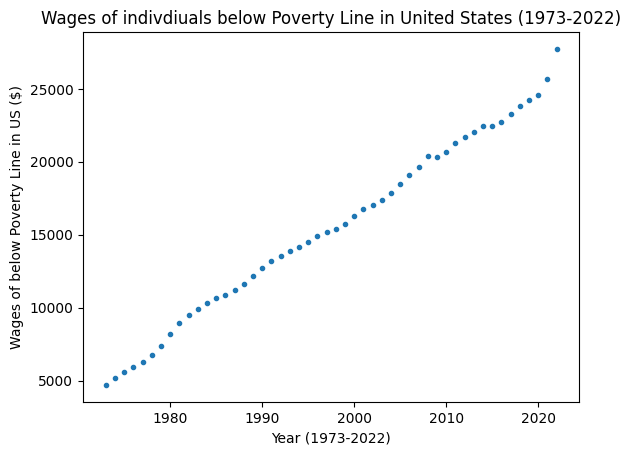

In [ ]:
year = df["year"]
below_poverty_wage = df["annual_poverty-level_wage"]

plt.scatter(year,below_poverty_wage, marker=".")

plt.xlabel("Year (1973-2022)")
plt.ylabel("Wages of below Poverty Line in US ($)")

plt.title("Wages of indivdiuals below Poverty Line in United States (1973-2022)")

# **SPLITTING DATA**

for the below code you should drop the column you are trying to test on
so hispanic use "hispanic_share_below_poverty_wages" for eg.

In [ ]:
train_data = df[(df['year'] >= 1973) & (df['year'] <= 2000)]
test_data = df[(df['year'] >= 2015) & (df['year'] <= 2020)]

X_train = train_data.drop('black_women_share_below_poverty_wages', axis=1)
y_train = train_data['black_women_share_below_poverty_wages']

X_test = test_data.drop('black_women_share_below_poverty_wages', axis=1)
y_test = test_data['black_women_share_below_poverty_wages']



In [ ]:
model = LinearRegression()


In [ ]:
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 0.5009139639196322
Root Mean Squared Error: 0.7077527562077255


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you have already trained the model and made predictions
y_test_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f'Testing MSE: {test_mse:.2f}')

test_r2 = r2_score(y_test, y_test_pred)

print(f'Testing R-squared: {test_r2:.2f}')


Testing MSE: 0.50
Testing R-squared: 0.98


# **Range for annual_poverty-level_wage target variable**


for the below blocks, replace the target variable with your variable blocks

In [ ]:

# Identify the target variable
target_variable = 'black_women_share_below_poverty_wages'

# Calculate the range of the target variable
target_range = df[target_variable].max() - df[target_variable].min()

print(f'Target Variable Range: {target_range}')


Target Variable Range: 32.900000000000006


future_data.csv is a csv file you must create yourself.
for the years 2015-2020 --> put in EVERY column from the original poverty_level_wages.csv (all 33 columns) except for the column you put as the target variable/column you dropped

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.9780794958960594


In [ ]:
# Identify the target variable
target_variable = 'black_women_share_below_poverty_wages'

# Calculate the range of the target variable
target_range = df[target_variable].max() - df[target_variable].min()

print(f'Target Variable Range: {target_range}')


Target Variable Range: 32.900000000000006


In [ ]:
future_2 = pd.read_csv('future_2.csv')

# Use the trained model to make predictions
future_predictions = model.predict(future_2)


In [ ]:
future_predictions = model.predict(future_2)

# **CREATE VISUALIZATIONS FOR PREDICTED VS. ACTUAL VALUES FOR ANNUAL POVERTY LEVEL WAGES FOR YEARS 2015-2020**

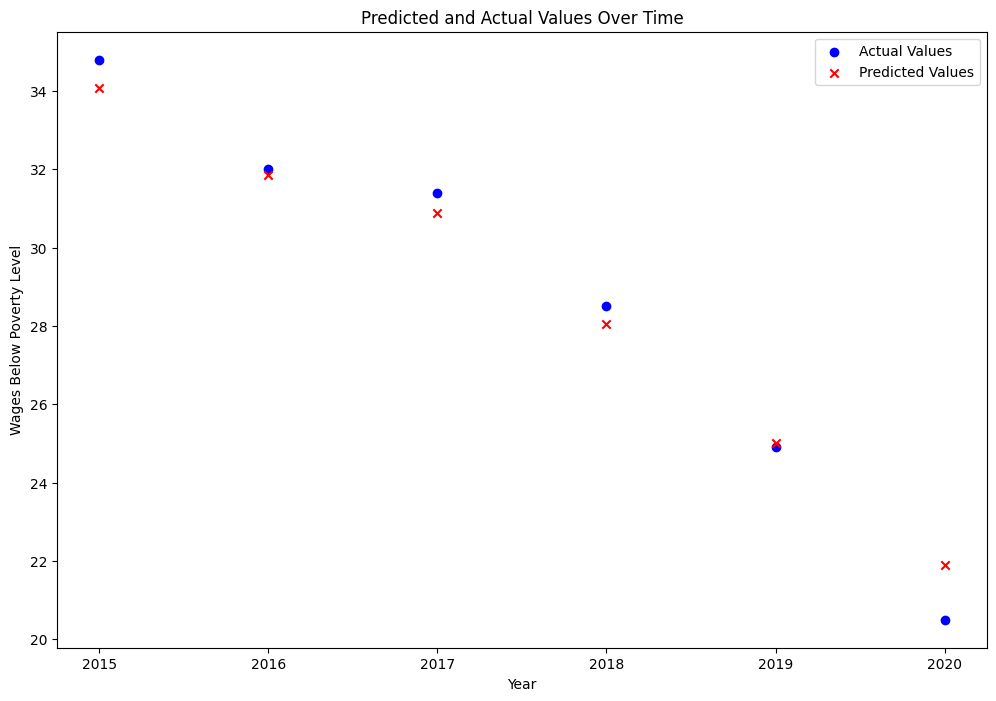

In [ ]:
years = future_2['year']

# Scatter plot of Predicted and Actual Values
plt.figure(figsize=(12, 8))
plt.scatter(years, y_test, label='Actual Values', color='blue')
plt.scatter(years, y_pred, label='Predicted Values', color='red', marker='x')
plt.title('Predicted and Actual Values Over Time')
plt.xlabel('Year')
plt.ylabel('Wages Below Poverty Level')
plt.legend()
plt.show()


#**SVR Model Training and Scaling + Data Visualization**

Actual VS Predicted Model

Column Names in future_2: Index(['year', 'annual_poverty-level_wage', 'hourly_poverty-level_wage',
       '0-75%_of_poverty_wages', '75-100%_of_poverty_wages',
       'share_below_poverty_wages', '100-125%_of_poverty_wages',
       '125-200%_of_poverty_wages', '200-300%_of_poverty_wages',
       '300%+_of_poverty_wages', 'men_0-75%_of_poverty_wages',
       'men_75-100%_of_poverty_wages', 'men_share_below_poverty_wages',
       'men_100-125%_of_poverty_wages', 'men_125-200%_of_poverty_wages',
       'men_200-300%_of_poverty_wages', 'men_300%+_of_poverty_wages',
       'women_0-75%_of_poverty_wages', 'women_75-100%_of_poverty_wages',
       'women_share_below_poverty_wages', 'women_100-125%_of_poverty_wages',
       'women_125-200%_of_poverty_wages', 'women_200-300%_of_poverty_wages',
       'women_300%+_of_poverty_wages', 'white_share_below_poverty_wages',
       'white_men_share_below_poverty_wages',
       'white_women_share_below_poverty_wages',
       'black_share_below_poverty_wag

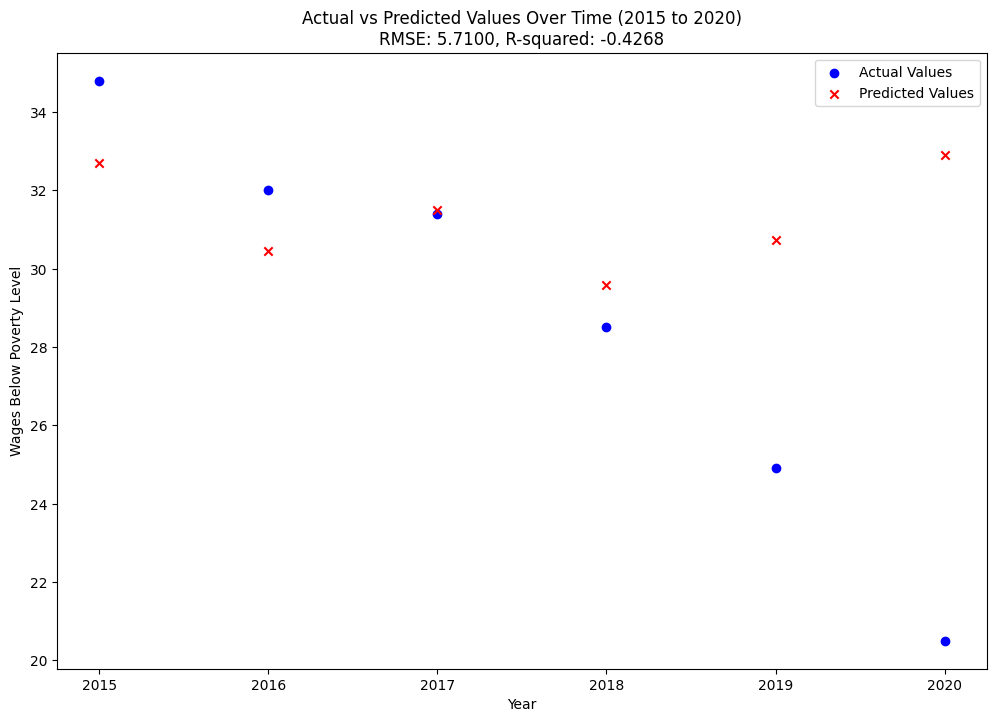

Root Mean Squared Error (RMSE): 5.709962188625513
R-squared: -0.4267696529984695


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import math

# Load the initial data
df_initial = pd.read_csv("poverty_level_wages.csv")

# Separate target from predictors
X_initial = df_initial.drop(['year', 'black_women_share_below_poverty_wages'], axis=1)
y_initial = df_initial['black_women_share_below_poverty_wages']

# Scale data
scaler = MinMaxScaler()
X_scaled_initial = scaler.fit_transform(X_initial)

# Build SVR model on the initial data
svr = SVR()
svr.fit(X_scaled_initial, y_initial)

# Load the future data (2015 to 2020)
future_2 = pd.read_csv('future_2.csv')

# Check and print column names to ensure consistency
print("Column Names in future_2:", future_2.columns)

# Ensure that the features used during training match the features in future_2
X_future = future_2.drop(['year'], axis=1)  # Assuming 'year' is the only column to drop
X_future_scaled = scaler.transform(X_future)

# Use the trained SVR model to make predictions for the future data
future_predictions = svr.predict(X_future_scaled)

# Load actual values for the future data from a different CSV file ('poverty_level_wages.csv')
df_future_actual = pd.read_csv('poverty_level_wages.csv')
y_future_actual = df_future_actual[df_future_actual['year'].between(2015, 2020)]['black_women_share_below_poverty_wages']

# Calculate RMSE and R-squared
rmse = math.sqrt(mean_squared_error(y_future_actual, future_predictions))
r_squared = r2_score(y_future_actual, future_predictions)

# Scatter plot of Actual and Predicted Values for the years 2015 to 2020
plt.figure(figsize=(12, 8))
plt.scatter(future_2['year'], y_future_actual, label='Actual Values', color='blue')
plt.scatter(future_2['year'], future_predictions, label='Predicted Values', color='red', marker='x')
plt.title(f'Actual vs Predicted Values Over Time (2015 to 2020)\nRMSE: {rmse:.4f}, R-squared: {r_squared:.4f}')
plt.xlabel('Year')
plt.ylabel('Wages Below Poverty Level')
plt.legend()
plt.show()

print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared:", r_squared)